# Costs / Risks When Buying a Home

1. The transaction costs for buying a home.
    1. Real estate agents charge 5-6% between the seller and buyers agent.
    2. Closing costs which include home inspection, attorneys, escrow, bank fees, etc. = 2 - 5%

2. The Foreclosure risk on average is about 1 in 200 / year = 0.5% / yr. (Illness, Injury, Job loss, Medical bills)

3. Continual costs of ownership.
    1. Home insurance is about .035% / year
    2. Property tax varies by state that you can assume is about .75% / year
    3. Upkeep costs / maintenance equals 2% / year approximately
    4. Hoa fees

4. You're immobile, tied down if you need to move.

5. Volatility for a highly leveraged asset if you are buying on margin / home loan.

6. Appreciation / depreciation generally follows inflation, or potentially slightly above inflation because otherwise, eventually, no-one could afford to buy a home. When home values do break away from inflation too far, then it usually requires a massive adjustment when demand decreases from a lack of available funds from buyers. Let's assume that appreciation on average is about 1% per year after adjusting for inflation which historical data suggest might be reasonable.

7. Interest costs

8. You're investing money into an asset which appreciates much slower than other assets such as stocks.


Benefits From Buying a Home

1. It is shielded if you have an emergency and need to file for bankruptcy (as long as you continue your monthly payments)

2. Tax deductions on interest, property tax

For a loan with monthly payment $d$, annual interest rate $r$, compoundings $k$ per year, for $N$ years has a loan value of $P_0$ that satisfies

$$P_0 = \frac{d(1 - (1 + \frac{r}{k})^{-Nk})}{r/k}$$

$Nk$ is the total number of months for the loan.

If we have already paid $m$ monthly payment of our loan, then it is the equivalent as if we have taken out a new loan with montly payment $d$ with a loan period of $Nk - m$ months. Therefore the remaining amount we owe on our loan is

$$P_m = \frac{d(1 - (1 + \frac{r}{k})^{-(Nk - m)})}{r/k}$$

The percent of the initial loan that is left to be paid off is then

$$\frac{P_m}{P_0} = \frac{\frac{d(1 - (1 + \frac{r}{k})^{-(Nk-m)})}{r/k}}{\frac{d(1 - (1 + \frac{r}{k})^{-Nk})}{r/k}} = \frac{d(1 - (1 + \frac{r}{k})^{-(Nk-m)})}{d(1 - (1 + \frac{r}{k})^{-Nk})} = \frac{1 - (1 + \frac{r}{12})^{-(12 N-m)}}{1 - (1 + \frac{r}{12})^{-12 N}}$$


Percent left owed on mortgage by month for a 30 year loan at a 5.0% interest rate:


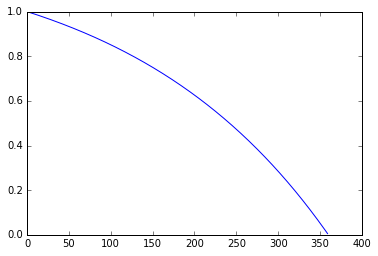

In [196]:
import math
import matplotlib.pyplot as plt

def f(num_months, interest_rt):  # just a helper function
    return 1 - (1 + interest_rt / 12) ** (-num_months)

def pct_owed(loan_term, num_payments_made, interest_rt):
    return f(loan_term * 12 - num_payments_made, interest_rt) / f(loan_term * 12, interest_rt)


# terms of loan
loan_term = 30
interest_rt = .05
down_pmt_pct = .20

months = range(loan_term * 12)


owed = [pct_owed(loan_term, num_payments_made=m, interest_rt=interest_rt) for m in months]
print("\nPercent left owed on mortgage by month for a %d year loan at a %s interest rate:"%(loan_term, str(interest_rt * 100)[0:4] + '%'))

plt.plot(months, owed)
plt.show()

The projected percent of the home you own is $$D + (1 - W)(1 - D),$$

where $D$ is the percent down payment, and $W$ is the percent of the loan still owed.

Also, let $I_n$ be the interest corresponding to loan payment $n$, with $P_n$ as the remaining balance on the loan after payment $n$. 

$$I_n = d - (P_{n-1} - P_n)$$

If $D$ is the percent down-payment for the home, $P_H$ is the price for the home, and $P_0$ is the initial loan amount, then $P_H = P_0 + D P_H$. Solving for $P_H$, $P_H = \frac{P_0}{1 - D}.$

The percent of the home purchase cost that is paid in interest for loan payment $n$ is then


$$\frac{I_n}{P_H} = \frac{d - (P_{n-1} - P_n)}{\frac{P_0}{1-D}} = \frac{d - \frac{d(1 - (1 + \frac{r}{k})^{-(Nk-(n-1))})}{r/k} + \frac{d(1 - (1 + \frac{r}{k})^{(-(Nk-n)})}{r/k}}{\frac{d(1 - (1 + \frac{r}{k})^{-Nk})}{(1-D)r/k}}$$

$$= (1-D)\frac{\frac{r}{k} - (1 - (1 + \frac{r}{k})^{-(Nk-(n-1))})) + (1 - (1 + \frac{r}{k})^{(-(Nk-n))})}{(1 - (1 + \frac{r}{k})^{-Nk})}$$

Let's put this into code for calculating home ownership costs:

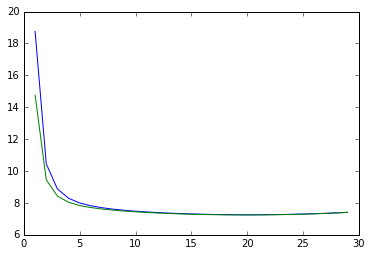

[(1, 18.756), (2, 10.452), (3, 8.873), (4, 8.29), (5, 7.996), (6, 7.819), (7, 7.698), (8, 7.608), (9, 7.538), (10, 7.481), (11, 7.434), (12, 7.394), (13, 7.361), (14, 7.332), (15, 7.309), (16, 7.29), (17, 7.276), (18, 7.265), (19, 7.259), (20, 7.256), (21, 7.257), (22, 7.263), (23, 7.272), (24, 7.284), (25, 7.301), (26, 7.322), (27, 7.347), (28, 7.377), (29, 7.41)]


In [211]:
avg_inflation = .0322  # geometric mean

# transaction costs percent: agents 5-6%, Closing costs 2-5%
transaction_low = .07
transaction_high = .11

# other cost parameters
foreclose_risk_per_yr = .005
cost_own_per_yr = .02785
monthly_hoa_fees_pct = 0  # change if needed
appreciation = .01  # inflation adjusted average home-value appreciation
avg_return_spy = .098
volitility_aversion = .008


def pct_interest_per_pmt(month, loan_term, down_pmt_pct):
    t1 = loan_term * 12 - (month - 1)
    t2 = loan_term * 12 - month
    return (1 - down_pmt_pct) * (interest_rt / 12 - f(t1, interest_rt) \
                                 + f(t2, interest_rt)) / f(loan_term * 12, interest_rt)


def cost_own(transaction_cst, interest_rt, down_pmt_pct, loan_term):
    '''
    To do: add tax deductions
    '''
    # Closure
    def cost_by_yrs(n_years):
                
        def pct_own(x):  # by month as % of home price
            return down_pmt_pct + (1 - pct_owed(loan_term, x, interest_rt)) * (1 - down_pmt_pct)
        
        n_months = 12 * n_years
        months = range(n_months)
        pct_opportunity_monthly = math.exp((avg_return_spy - appreciation - avg_inflation) / 12) - 1
        opportunity_costs = pct_opportunity_monthly * sum(pct_own(m) for m in months)
        #opportunity_costs = 0
            
        # Don't adjust for inflation nor appreciation since we're looking at risk relative to today %
        foreclose_risk_loss = sum(pct_own(i) * foreclose_risk_per_yr / 12 for i in months)
        #  inflation adjusted % interest of payment by month with respect to the initial home price
        interest_paid = sum(pct_interest_per_pmt(m, loan_term, down_pmt_pct) \
                            * math.exp(-avg_inflation * m / 12) for m in months)
        
        return transaction_cst / n_years + cost_own_per_yr * n_years + foreclose_risk_loss \
             - (math.exp((appreciation - volitility_aversion) * n_years) - 1) + interest_paid \
             + monthly_hoa_fees_pct * n_months + opportunity_costs
        
    return cost_by_yrs

cost_high = cost_own(transaction_high, interest_rt, down_pmt_pct, loan_term)
cost_low = cost_own(transaction_low, interest_rt, down_pmt_pct, loan_term)

all_yrs = range(1, 30)
all_pcts1 = [round(100 * cost_high(yrs) / yrs, 3) for yrs in all_yrs]
all_pcts2 = [round(100 * cost_low(yrs) / yrs, 3) for yrs in all_yrs]

plt.plot(all_yrs, all_pcts1)
plt.plot(all_yrs, all_pcts2)
plt.show()
print(list(zip(all_yrs, all_pcts1)))

In [205]:
n = 5 # years you intend to keep your home
pct = cost_high(n) / n
pct

0.07996405877759202

In [206]:
pct * 200000 / 12

1332.734312959867

For a \$200,000 home, and for a given number of years, when is it better to rent?

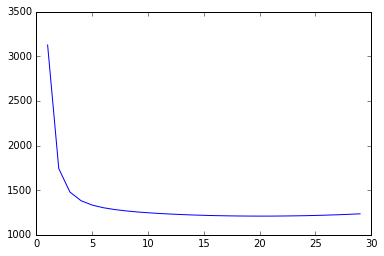

[(1, 3126.0), (2, 1742.0), (3, 1478.83), (4, 1381.67), (5, 1332.67), (6, 1303.17), (7, 1283.0), (8, 1268.0), (9, 1256.33), (10, 1246.83), (11, 1239.0), (12, 1232.33), (13, 1226.83), (14, 1222.0), (15, 1218.17), (16, 1215.0), (17, 1212.67), (18, 1210.83), (19, 1209.83), (20, 1209.33), (21, 1209.5), (22, 1210.5), (23, 1212.0), (24, 1214.0), (25, 1216.83), (26, 1220.33), (27, 1224.5), (28, 1229.5), (29, 1235.0)]

Monthly rent for a $200000 home is usually $1600.0 to $2000.0
https://www.quora.com/If-I-purchase-a-house-for-300000-how-much-can-I-rent-it-out


In [209]:
home_price = 200000
own_monthly_expense = [round(home_price * v / 12 / 100, 2) for v in all_pcts1]
plt.plot(all_yrs, own_monthly_expense)
plt.show()
print(list(zip(all_yrs, own_monthly_expense)))
print('\nMonthly rent for a $%s home is usually $%s to $%s' % (home_price, home_price * .008, home_price * .01))
print('https://www.quora.com/If-I-purchase-a-house-for-300000-how-much-can-I-rent-it-out')

Why does our economic system tend towards a growing gap between rich and poor?

One major factor is the difference between stock returns and home appreciation, combined with low capital-gains taxes. The poor have to have a place to live, forcing either renting, or a lower-return investment with little left over for stocks.

Should you buy that wedding ring (average \$3,500 in Utah)? Should you have that expensive wedding?

__[Marriage Study](https://www.independent.co.uk/life-style/love-sex/wedding-cost-marriage-divorce-ring-how-much-price-study-a8435646.html)__

Association is not causation. But, it can't hurt to save instead.

How much might that money be worth in 5 years in the SPY if you saved the money instead, and got a gold-plated cubic-zirconia ring with a simple wedding?

Even worse, how much might the wedding cost you long-term if you buy it using a loan / credit?

In [208]:
typical_wedding_cost = 20000
typical_ring_cost = 3500
budget_wedding_cost = 2000
budget_ring_cost = 350
avg_spy = .098
savings = typical_wedding_cost + typical_ring_cost - budget_wedding_cost - budget_ring_cost
print("\n$" + str(round(savings * math.exp((avg_spy - avg_inflation) * 5), 2)) + " adjusted for inflation")


$29389.57 adjusted for inflation
